In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

In [17]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [5]:
df = pd.read_csv('Dataset Netflix.csv', encoding='unicode_escape')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [6]:
df.shape

(5044, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
df['Year'] = df['Date'].apply(lambda x : str(x)[:4])
df['Month'] = df['Date'].apply(lambda x : str(x)[5:7])
df['Day'] = df['Date'].apply(lambda x : str(x)[8:10])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,05,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,05,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,05,28
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,05,29
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,05,30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5044 non-null   datetime64[ns]
 1   Open       5044 non-null   float64       
 2   High       5044 non-null   float64       
 3   Low        5044 non-null   float64       
 4   Close      5044 non-null   float64       
 5   Adj Close  5044 non-null   float64       
 6   Volume     5044 non-null   int64         
 7   Year       5044 non-null   object        
 8   Month      5044 non-null   object        
 9   Day        5044 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 394.2+ KB


In [14]:
df = df['Open'].values

In [15]:
df = df.reshape(-1, 1)

In [17]:
df_train = np.array(df[:int(df.shape[0]*0.8)])
df_test = np.array(df[int(df.shape[0]*0.8):])

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)

In [19]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0]) 
        y.append(df[i, 0]) 
    x = np.array(x) 
    y = np.array(y)
    return x,y

In [20]:
x_train, y_train = create_dataset(df_train)
x_test, y_test = create_dataset(df_test)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
epochs = 40
batch_size = 64 

# start the training
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
model.save('stock_prediction')

Epoch 1/40
63/63 [==============================] - 53s 521ms/step - loss: 0.0034
Epoch 2/40
63/63 [==============================] - 47s 749ms/step - loss: 8.1639e-04
Epoch 3/40
63/63 [==============================] - 59s 941ms/step - loss: 6.4967e-04
Epoch 4/40
63/63 [==============================] - 69s 1s/step - loss: 6.9849e-04
Epoch 5/40
63/63 [==============================] - 70s 1s/step - loss: 7.6201e-04
Epoch 6/40
63/63 [==============================] - 72s 1s/step - loss: 8.3258e-04
Epoch 7/40
63/63 [==============================] - 79s 1s/step - loss: 4.6856e-04
Epoch 8/40
63/63 [==============================] - 88s 1s/step - loss: 6.1261e-04
Epoch 9/40
63/63 [==============================] - 87s 1s/step - loss: 5.0688e-04
Epoch 10/40
63/63 [==============================] - 90s 1s/step - loss: 5.0831e-04
Epoch 11/40
63/63 [==============================] - 87s 1s/step - loss: 5.5984e-04
Epoch 12/40
63/63 [==============================] - 86s 1s/step - loss: 5.4814e

INFO:tensorflow:Assets written to: stock_prediction\assets


In [26]:
# Load the model
model = load_model('stock_prediction')

In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

30/30 [==============================] - 4s 36ms/step


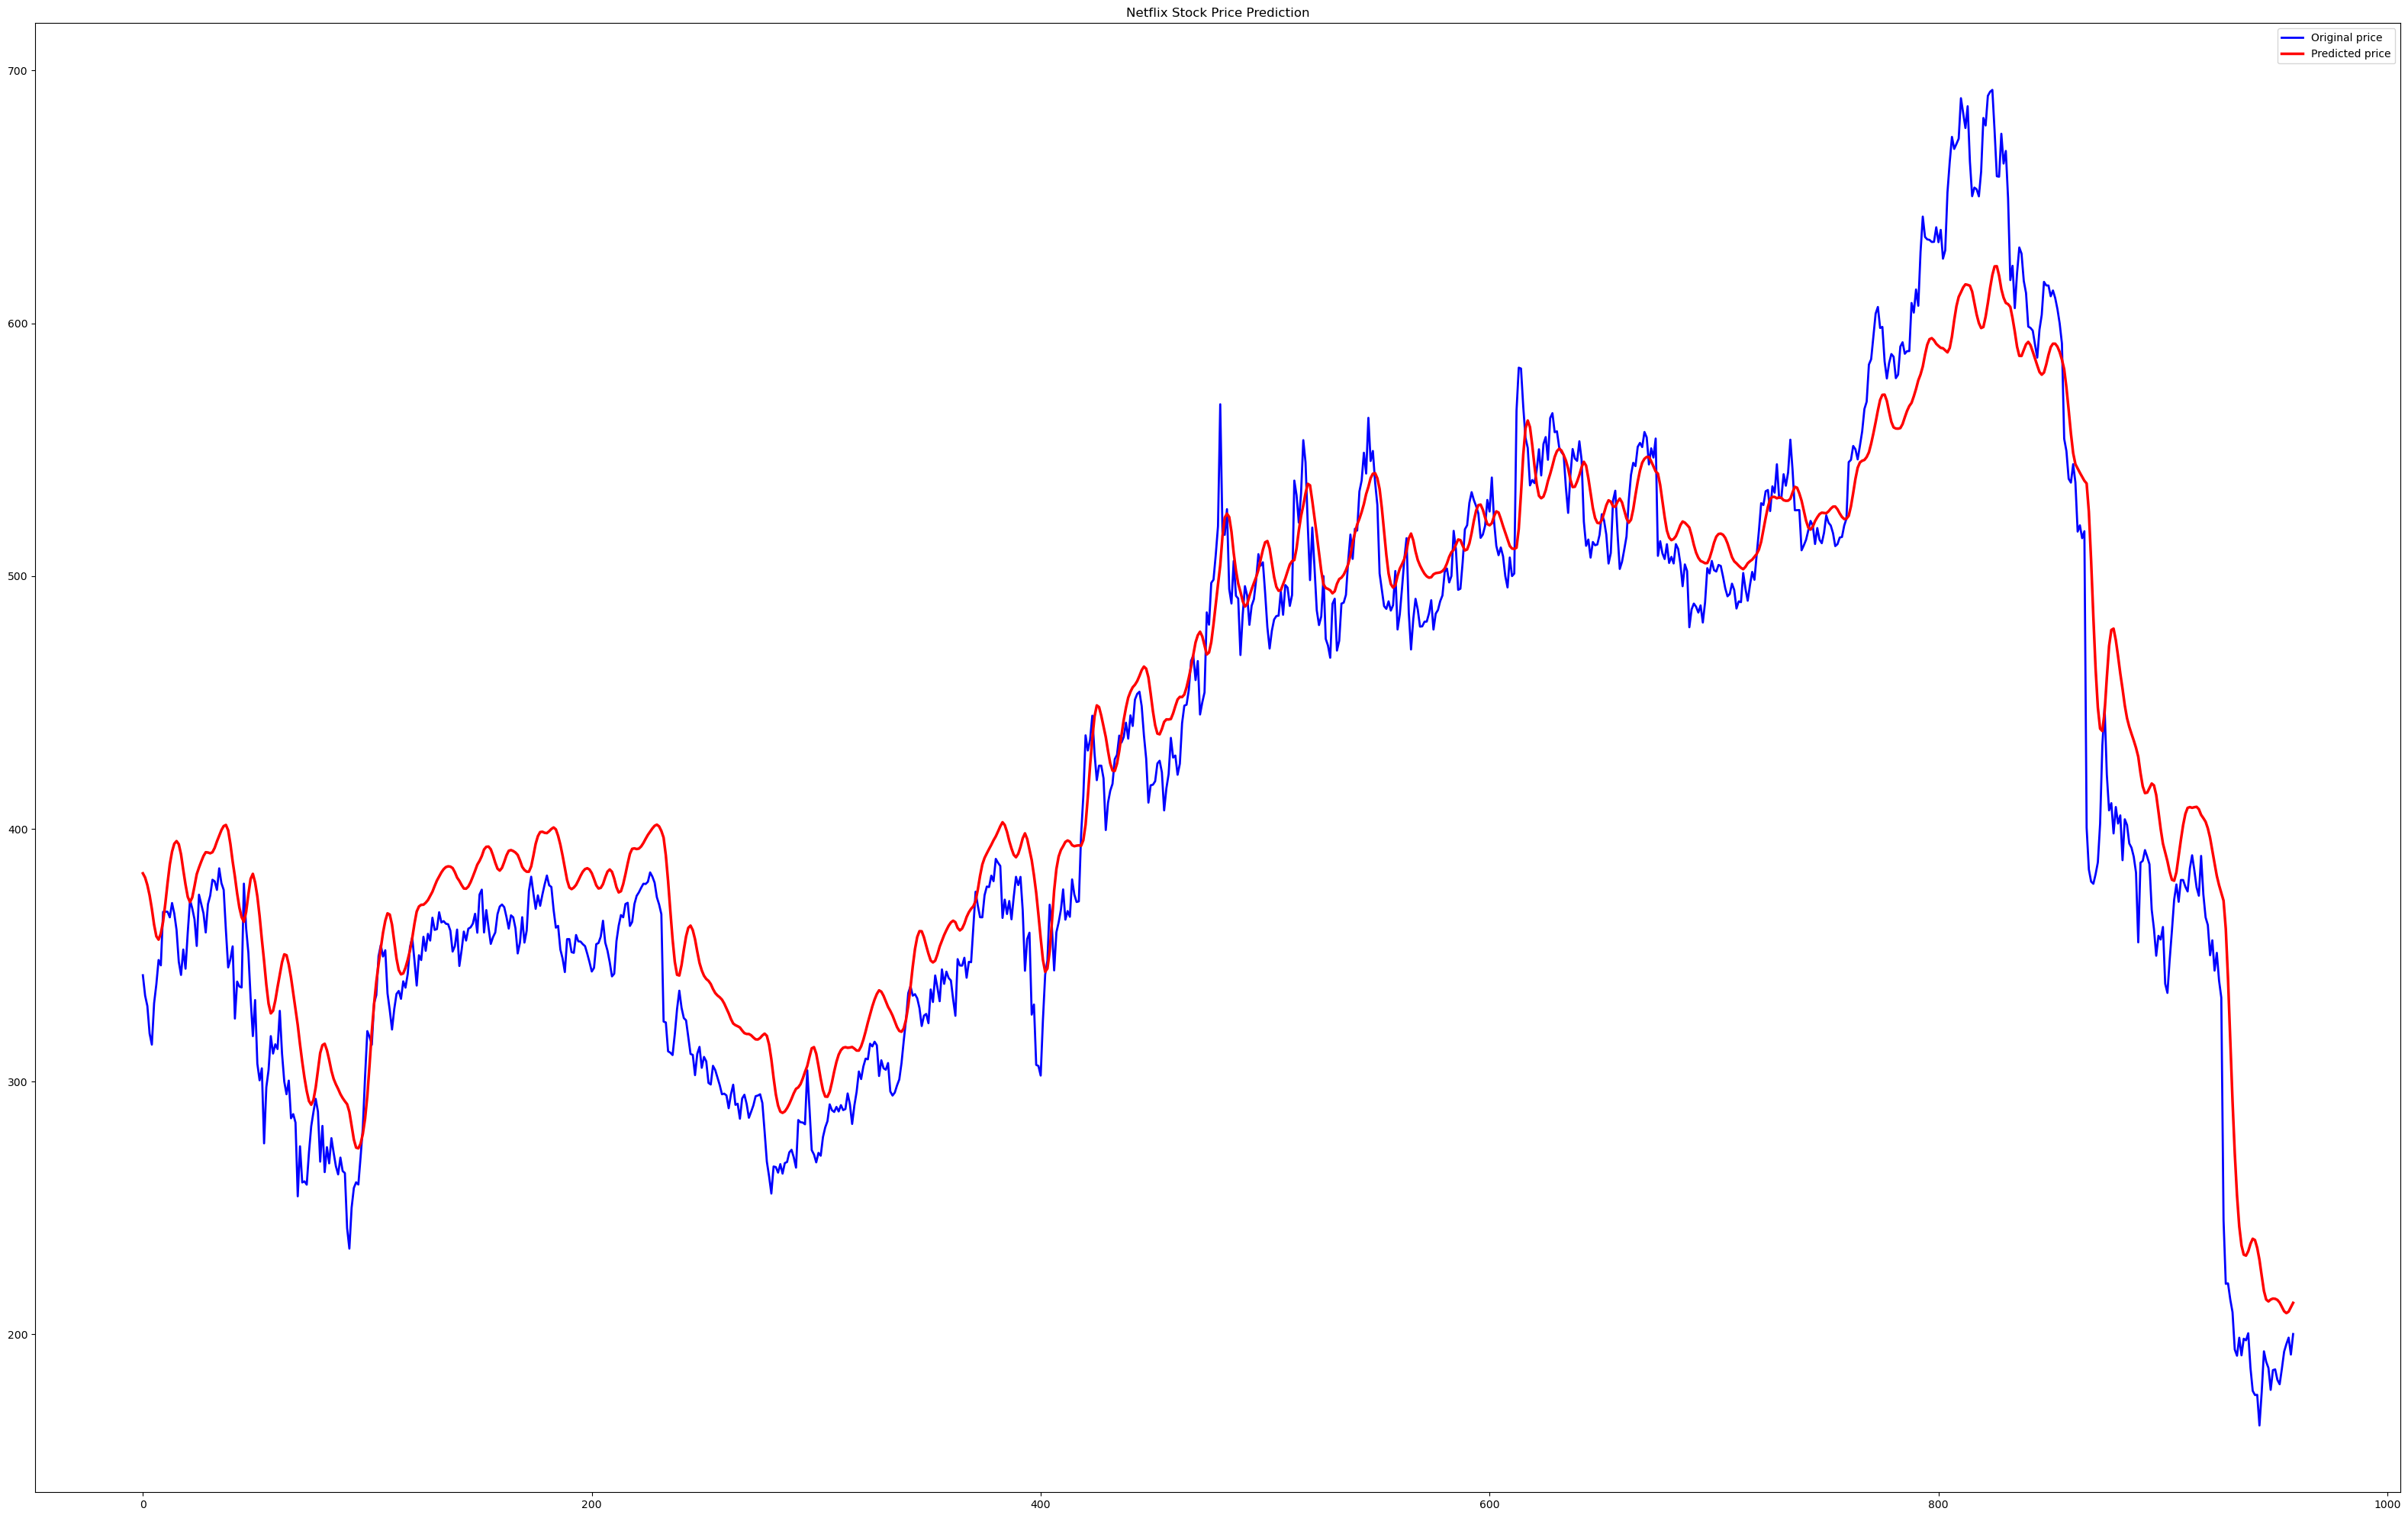

In [28]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(40,25))
ax.plot(y_test_scaled, color='blue', linewidth=2, label='Original price')
plt.plot(predictions, color='red', linewidth=2.5, label='Predicted price')
plt.title('Netflix Stock Price Prediction')
plt.legend();